In [1]:
import sys
print(sys.version)

3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]


In [2]:
import sklearn
sklearn.__version__

'1.0.2'

In [3]:
import numpy as np
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
X = data.data
X.shape # an array of each dimension (number of rows, number of columns)

(569, 30)

In [6]:
noise = np.random.randn(X.shape[0],X.shape[0]) # artificially add some noise 569*569

In [7]:
X = np.hstack([X,noise]) # adding noise as features, to make the problem harder to solve

In [8]:
Y = data.target #label

In [9]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [10]:
# please try out different C values
lr = LR(C=1.0) # create a model, set the parameters (hyperparameter)
lr.fit(X_train, Y_train) # train the model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [11]:
lr.score(X_test, Y_test) # prediction performance, accuracy

0.8531468531468531

In [12]:
from sklearn.metrics import precision_score,recall_score

In [13]:
precision = precision_score(Y_test, lr.predict(X_test),pos_label=1)
recall = recall_score(Y_test, lr.predict(X_test),pos_label=1)
print(precision)
print(recall)

0.8947368421052632
0.8854166666666666


In [14]:
lr.classes_

array([0, 1])

In [15]:
# TPR = TP/P
# FPR = FP/N
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, lr.predict_proba(X_test)[:,1],pos_label=1)

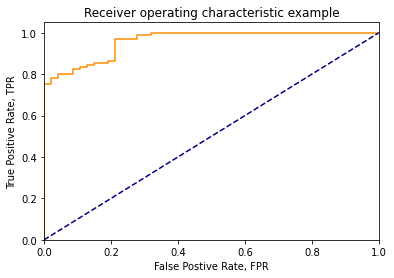

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Postive Rate, FPR')
plt.ylabel('True Positive Rate, TPR')
plt.title('Receiver operating characteristic example')
plt.show()